In [1]:
import warnings 
import pandas as pd

warnings.simplefilter('ignore')
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: target, dtype: int64


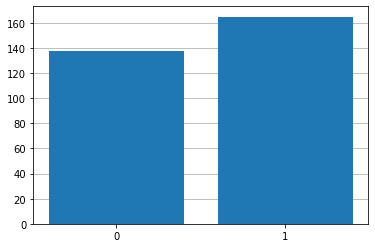

In [2]:
print(df['target'].value_counts())

import matplotlib.pyplot as plt 

plt.bar(['0', '1'], df['target'].value_counts().sort_index(), zorder=3)
plt.grid(axis='y',zorder=0);

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Split data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
import warnings

warnings.simplefilter('ignore')

# Import numpy
import numpy as np

#omd
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=kfold)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.6f' % (scores.mean()))

NameError: name 'RepeatedStratifiedKFold' is not defined

In [9]:
# omd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold
import warnings

warnings.simplefilter('ignore')

def grid_search(params, random=False, combinations=20): 
    
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        eval_metric='auc',random_state=2, use_label_encoder=False,
                        verbosity=0)
    
    # https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/ 
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    # kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2)
    
    if random:
        grid = RandomizedSearchCV(xgb, params, scoring='roc_auc', cv=kfold, 
               n_iter=combinations, n_jobs=-1, random_state=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, scoring='roc_auc', cv=kfold, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [10]:
# omd
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.5, 1],
                    'n_estimators':[100, 200, 300, 400, 800, 1000]
                    },
            random=False)

/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is d

KeyboardInterrupt: 

In [35]:
# omd
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3,0.4, 0.5],
                    'n_estimators':[100, 200, 300, 400, 800, 1000, 1500, 2000],
                    'max_depth':[2, 3, 5, 6, 8],
                    'gamma':[0, 0.1, 0.5, 1, 2, 5],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'subsample':[0.5, 0.7, 0.8, 0.9, 1],
                    'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],
                    },
            combinations=30,
            random=True)

/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages

Best params: {'subsample': 0.9, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.5}
Best score: 0.89885


In [ ]:
# omd
# using params that showed high performance:
model = XGBClassifier()

In [73]:
# omd
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# Split data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=2)
model_best = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, 
                           subsample=0.9, n_estimators=400, min_child_weight=1, 
                           max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.5)
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)
print('roc_auc: ', roc_auc_score(y_pred, y_test))
print('accuracy:{0:0.6f}'.format(accuracy_score(y_pred, y_test)))

[16:07:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc:  0.818840579710145
accuracy:0.820000


In [74]:
# omd
# it's stratified!
print(y_train.mean())
print(y_test.mean())

0.5467980295566502
0.54


In [26]:
# omd
grid_search(params={'learning_rate':[0.01],
                    'n_estimators':[1000, 1500, 2000]
                    },
            random=False)

/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages

Best params: {'learning_rate': 0.01, 'n_estimators': 1000}
Best score: 0.87673


In [7]:
# Import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [8]:
# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=kfold)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.72 0.82 0.75 0.8  0.82]
Accuracy mean: 0.78


In [9]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [10]:
def grid_search(params, random=False): 
    
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1, random_state=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [11]:
grid_search(params={'n_estimators':[100, 200, 400, 800]})

Best params: {'n_estimators': 100}
Best score: 0.78235


In [12]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

Best params: {'learning_rate': 0.05}
Best score: 0.79585


In [13]:
grid_search(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 2}
Best score: 0.79902


In [14]:
grid_search(params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]})

Best params: {'gamma': 0.5}
Best score: 0.79574


In [15]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5]})

Best params: {'min_child_weight': 5}
Best score: 0.81219


In [16]:
grid_search(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'subsample': 0.8}
Best score: 0.79579


In [17]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 0.7}
Best score: 0.79902


In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [19]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
eval_set = [(X_test, y_test)]
eval_metric='error'
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15790
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
[11]	validation_0-error:0.15790
[12]	validation_0-error:0.15790
[13]	validation_0-error:0.17105
[14]	validation_0-error:0.17105
[15]	validation_0-error:0.17105
[16]	validation_0-error:0.15790
[17]	validation_0-error:0.17105
[18]	validation_0-error:0.15790
[19]	validation_0-error:0.17105
[20]	validation_0-error:0.17105
[21]	validation_0-error:0.17105
[22]	validation_0-error:0.18421
[23]	validation_0-error:0.18421
[24]	validation_0-error:0.17105
[25]	validation_0-error:0.18421
[26]	validation_0-error:0.18421
[27]	validation_0-error:0.18421
[28]	validation_0-error:0.18421
[29]	validation_0-error:0.18421
[30]	validation_0-error:0.18421
[31]	validation_0-

In [20]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
eval_set = [(X_test, y_test)]
eval_metric="error"
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=10, verbose=True)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15790
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
[11]	validation_0-error:0.15790
Stopping. Best iteration:
[1]	validation_0-error:0.10526

Accuracy: 89.47%


In [21]:
model = XGBClassifier(random_state=2, n_estimators=5000)
eval_set = [(X_test, y_test)]
eval_metric="error"
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=100)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15790
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
[11]	validation_0-error:0.15790
[12]	validation_0-error:0.15790
[13]	validation_0-error:0.17105
[14]	validation_0-error:0.17105
[15]	validation_0-error:0.17105
[16]	validation_0-error:0.15790
[17]	validation_0-error:0.17105
[18]	validation_0-error:0.15790
[19]	validation_0-error:0.17105
[20]	validation_0-error:0.17105
[21]	validation_0-error:0.17105
[22]	validation_0-error:0.18421
[23]	validation_0-error:0.18421
[24]	validation_0-error:0.17105
[25]	validation_0-error:0.18421
[26]	validation_0-error:0.18421
[27]	validation_0-error:0.18421
[28]	validation_0-error:0.18421
[29]	validation

In [22]:
grid_search(params={'n_estimators':[2, 25, 50, 75, 100]})

Best params: {'n_estimators': 50}
Best score: 0.78907


In [23]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8], 
                    'n_estimators':[50]})

Best params: {'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


In [24]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8], 
                    'n_estimators':[2, 50, 100]})

Best params: {'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


In [35]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


In [26]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50}
Best score: 0.83869


In [27]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'max_depth': 1, 'n_estimators': 50, 'subsample': 1}
Best score: 0.83869


In [28]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5], 
                    'n_estimators':[2]})

Best params: {'learning_rate': 0.5, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 2, 'subsample': 0.9}
Best score: 0.81224


In [29]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5, None], 
                    'n_estimators':[2, 25, 50, 75, 100]}, random=True)

Best params: {'subsample': 0.6, 'n_estimators': 25, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.5}
Best score: 0.82208


In [30]:
grid_search(params={'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


In [31]:
grid_search(params={'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 1, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.83869


In [32]:
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.84852


In [33]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3], 
                    'colsample_bylevel':[0.9], 
                    'colsample_bytree':[0.8], 
                    'colsample_bynode':[0.5], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.84852
